In [12]:
from google.colab import drive
drive.mount('/content/driver', force_remount=True)

Mounted at /content/driver


In [13]:
# path = '/content/driver/My Drive/Colab Notebooks/finaltest/SVR/datacsv/k62/'
path = '/content/driver/My Drive/Colab Notebooks/alldatacsv/*.csv'
#file du lieu train test tot nhat moi dong 1 file
pathTrainTest = '/content/driver/My Drive/project3model/'


fileTest= pathTrainTest+'fileTest.txt'
fileTrain= pathTrainTest+'fileTrain.txt'
modelDir = '/content/driver/My Drive/project3model/ATXT.joblib.dat'

In [14]:
from glob import glob
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
 
files = glob(path)

In [15]:
from sklearn.metrics import explained_variance_score
def mean_absolute_percentage_error(y_true, y_pred, start_of_test):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return explained_variance_score(y_true, y_pred)

def mean_absolute_percentage_error_25(y_true, y_pred, start_of_test):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
 
    y_true_25 = np.array([])
    y_pred_25 = np.array([])
    for element in range(count_test):
        t = start_of_test[element] + math.floor(len_of_test[element] / 4)
        y_true_25 = np.concatenate((y_true_25, np.array([ y_true[ int(t.item()) ] ])))
        y_pred_25 = np.concatenate((y_pred_25, np.array([ y_pred[ int(t.item()) ] ])))
    # return np.mean(np.abs((y_true_25 - y_pred_25) / y_true_25)) * 100
    return explained_variance_score(y_true_25, y_pred_25)
 
def mean_absolute_percentage_error_1_to_25(y_true, y_pred, start_of_test):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
 
    y_true_1_to_25 = np.array([])
    y_pred_1_to_25 = np.array([])
    for element in range(count_test):
        t = start_of_test[element] + math.floor(len_of_test[element] / 4)
        for t_value in range( int(start_of_test[element].item()), int(t.item()) ):
            y_true_1_to_25 = np.concatenate((y_true_1_to_25, np.array([ y_true[ t_value ] ])))
            y_pred_1_to_25 = np.concatenate((y_pred_1_to_25, np.array([ y_pred[ t_value ] ])))
    # return np.mean(np.abs((y_true_1_to_25 - y_pred_1_to_25) / y_true_1_to_25)) * 100
    return explained_variance_score(y_true_1_to_25, y_pred_1_to_25)
 
def mean_absolute_percentage_error_50(y_true, y_pred, start_of_test):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
 
    y_true_50 = np.array([])
    y_pred_50 = np.array([])
    for element in range(count_test):
        t = start_of_test[element] + math.floor(len_of_test[element] / 2)
        y_true_50 = np.concatenate((y_true_50, np.array([ y_true[ int(t.item()) ] ])))
        y_pred_50 = np.concatenate((y_pred_50, np.array([ y_pred[ int(t.item()) ] ])))
    # return np.mean(np.abs((y_true_50 - y_pred_50) / y_true_50)) * 100
    return explained_variance_score(y_true_50, y_pred_50)

def mean_absolute_percentage_error_1_to_50(y_true, y_pred, start_of_test):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
 
    y_true_1_to_50 = np.array([])
    y_pred_1_to_50 = np.array([])
    for element in range(count_test):
        t = start_of_test[element] + math.floor(len_of_test[element] / 2)
        for t_value in range( int(start_of_test[element].item()), int(t.item()) ):
            y_true_1_to_50 = np.concatenate((y_true_1_to_50, np.array([ y_true[ t_value ] ])))
            y_pred_1_to_50 = np.concatenate((y_pred_1_to_50, np.array([ y_pred[ t_value ] ])))
    # return np.mean(np.abs((y_true_1_to_50 - y_pred_1_to_50) / y_true_1_to_50)) * 100
    return explained_variance_score(y_true_1_to_50, y_pred_1_to_50)

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV
from joblib import dump
from sklearn.svm import SVR 
from joblib import load
import math
filetrain = open(fileTrain,'r')
filetest = open(fileTest,'r')

li1 = []
for line in filetrain: 
    df = pd.read_csv(line.strip(), index_col = None, header = 0)
    li1.append(df)  
dataFrame1 = pd.concat(li1, axis = 0, ignore_index = True)
X_train, y_train = dataFrame1.iloc[:, [0, 2]], dataFrame1.iloc[:, 4] 


li2 = []
for line in filetest: 
    df = pd.read_csv(line.strip(), index_col = None, header = 0)
    li2.append(df)  
dataFrame2 = pd.concat(li2, axis = 0, ignore_index = True)
X_test, y_test = dataFrame2.iloc[:, [0, 2]], dataFrame2.iloc[:, 4] 



svr = SVR()

parameters = {}
parameters['kernel'] = ['rbf']
parameters['C'] = [1, 1e1, 1e2, 1e3, 1e4, 1e5]
parameters['gamma'] = [1e-3, 1e-2, 1e-1]


grids = GridSearchCV(svr,parameters,cv=2)

grids.fit(X_train, y_train)

print('grids.best_params_:')
print(grids.best_params_)

dump(grids, modelDir)

grids.best_params_:
{'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}


['/content/driver/My Drive/project3model/ATXT.joblib.dat']

In [17]:
filetest = open(fileTest,'r')

li2 = []
for line in filetest: 
    df = pd.read_csv(line.strip(), index_col = None, header = 0)
    li2.append(df)  
dataFrame2 = pd.concat(li2, axis = 0, ignore_index = True)
X_test, y_test = dataFrame2.iloc[:, [0, 2]], dataFrame2.iloc[:, 4] 
print(X_test)
print(y_test)

           AT        XT
0    1.633333  0.154979
1    2.666667  0.394426
2    3.833333  0.661368
3    4.679167  1.000000
4    1.745833  0.061884
..        ...       ...
378  4.212500  1.000000
379  1.233333  0.182045
380  2.633333  0.429667
381  3.333333  0.512281
382  4.479167  1.000000

[383 rows x 2 columns]
0       4.679167
1       4.679167
2       4.679167
3       4.679167
4      16.712500
         ...    
378     4.212500
379     4.479167
380     4.479167
381     4.479167
382     4.479167
Name: TOTAL_AT, Length: 383, dtype: float64


In [18]:
loaded_model = load(modelDir)
 
preds = loaded_model.predict(X_test)
 
# Thông tin test
y_test_ward = np.concatenate((y_test, np.array([0])))
count_test = 0
len_of_test = np.array([])
tmp = 1
for element in range(len(y_test_ward) - 1):
    if y_test_ward[element] != y_test_ward[element + 1]:
        count_test = count_test + 1
        len_of_test = np.concatenate((len_of_test, np.array([tmp])))
        tmp = 1
    else:
        tmp = tmp + 1
start_of_test = np.array([0])
for element in range(1, count_test):
    start_of_test = np.concatenate((start_of_test, np.array([ len_of_test[element - 1] + start_of_test[element - 1] ])))
print('count_test:')
print(count_test)
print('len_of_test:')
print(len_of_test)
print('start_of_test:')
print(start_of_test)

mape = mean_absolute_percentage_error(y_test, preds, start_of_test)
mape25 = mean_absolute_percentage_error_25(y_test, preds, start_of_test)
mape1to25 = mean_absolute_percentage_error_1_to_25(y_test, preds, start_of_test)
mape50 = mean_absolute_percentage_error_50(y_test, preds, start_of_test)
mape1to50 = mean_absolute_percentage_error_1_to_50(y_test, preds, start_of_test)
 
print("Độ chính xác dự đoán thời gian của dữ liệu K62:")
print('Tất cả thời điểm:')
print(mape*100)
print('25%:')
print(mape25*100)
print('1 -> 25%:')
print(mape1to25*100)
print('50%:')
print(mape50*100)
print('1 -> 50%:')
print(mape1to50*100)
 
# rmse = np.sqrt(mean_squared_error(y_test, preds))

count_test:
34
len_of_test:
[ 4.  9. 24.  4. 12. 23.  9. 11. 11. 41.  4.  6. 29.  4.  4.  5. 10. 14.
 30. 13. 10.  9. 21.  4.  5. 14.  6.  9.  9.  4. 11.  6.  4.  4.]
start_of_test:
[  0.   4.  13.  37.  41.  53.  76.  85.  96. 107. 148. 152. 158. 187.
 191. 195. 200. 210. 224. 254. 267. 277. 286. 307. 311. 316. 330. 336.
 345. 354. 358. 369. 375. 379.]
Độ chính xác dự đoán thời gian của dữ liệu K62:
Tất cả thời điểm:
83.72355935742422
25%:
71.42395772732446
1 -> 25%:
69.30078537251427
50%:
81.1825498297548
1 -> 50%:
74.79026718483846


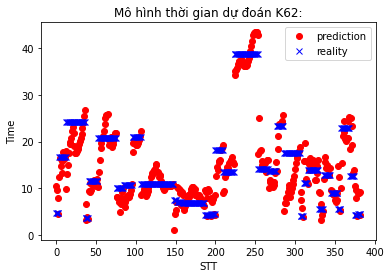

In [19]:
import matplotlib.pyplot as plt

plt.plot(preds, 'o', color = 'r')
plt.plot(y_test, 'x', color = 'b')
plt.title("Mô hình thời gian dự đoán K62:")
plt.xlabel("STT")
plt.ylabel("Time")
 
plt.legend(('prediction', 'reality'), loc = 'upper right')
 
plt.show()